In [7]:
import sys
sys.path.append('/home/jovyan/work/')
sys.path.append('/home/jovyan/work/src')
sys.path.append('/home/jovyan/work/src/data')
sys.path.append('/home/jovyan/work/src/data_explore')
sys.path.append('/home/jovyan/work/src/features')
sys.path.append('/home/jovyan/work/src/models')
sys.path.append('/home/jovyan/work/src/analysis')


In [8]:
print(sys.path)

['/home/jovyan/work/notebooks', '/opt/conda/lib/python311.zip', '/opt/conda/lib/python3.11', '/opt/conda/lib/python3.11/lib-dynload', '', '/opt/conda/lib/python3.11/site-packages', '/home/jovyan/work/', '/home/jovyan/work/src', '/home/jovyan/work/src/data', '/home/jovyan/work/src/data_explore', '/home/jovyan/work/src/features', '/home/jovyan/work/src/models', '/home/jovyan/work/src/analysis', '/home/jovyan/work/', '/home/jovyan/work/src', '/home/jovyan/work/src/data', '/home/jovyan/work/src/data_explore', '/home/jovyan/work/src/features', '/home/jovyan/work/src/models', '/home/jovyan/work/src/analysis']


In [9]:
from src import data,data_explore,features
from data import create_input_data
from data_explore import explore_util
from features import build_features
from models import train_model,predict_model
from analysis import analyze_pred

import pandas as pd

In [10]:
def get_jobs_in_range(dfq,start,end):
    df1=dfq.query('submit >= @start and submit < @end')
    return df1

In [11]:
# weekly prediction for the month of March
df_arr={}
df_mar = create_input_data.read_data(csv_file_name="../data/processed/lookback5_sw_mar31.csv", parse_dates_col=[1,2])

#df_arr['1wee']= get_jobs_in_range(df_feb_aug,"2022-03-01","2022-03-07")
#df_arr['april']= get_jobs_in_range(df_feb_aug,"2022-04-01","2022-05-01")


In [12]:
#df_mar = get_jobs_in_range(df_feb_aug1,"2022-03-01", "2022-04-02")
df_mar

,index,submit,start,nnodes,max_minutes,queue_minutes,backlog_minutes,backlog_num_jobs,running_num_jobs,running_minutes,...,delta_t4,qm5,nnodes5,max_minutes5,queue_minutes5,backlog_minutes5,backlog_num_jobs5,running_num_jobs5,running_minutes5,delta_t5
0,36043,2022-03-01 00:01:56,2022-03-01 00:01:57,1,15,0,381027,234,20786,8077218,...,0.000000,-200,-200,-200,-200,-200,-200,-200,-200,0.000000
1,36044,2022-03-01 00:01:57,2022-03-01 00:02:02,1,15,0,381027,234,20786,8077218,...,0.000000,-200,-200,-200,-200,-200,-200,-200,-200,0.000000
2,36045,2022-03-01 00:01:57,2022-03-01 00:02:02,1,15,0,381042,235,20786,8077218,...,0.000000,-200,-200,-200,-200,-200,-200,-200,-200,0.000000
3,36046,2022-03-01 00:01:58,2022-03-01 00:02:02,1,15,0,381057,236,20786,8077218,...,0.000000,-200,-200,-200,-200,-200,-200,-200,-200,0.000000
4,36047,2022-03-01 00:01:59,2022-03-01 00:02:02,1,15,0,381072,237,20786,8077218,...,0.000000,-200,-200,-200,-200,-200,-200,-200,-200,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46831,82874,2022-04-01 23:40:41,2022-04-01 23:40:42,1,360,0,4620,36,20889,8099526,...,3.050000,0,4,2880,0,4620,36,20888,8098806,8.083333
46832,82875,2022-04-01 23:48:18,2022-04-01 23:48:19,5,720,0,4620,36,20889,8099526,...,10.450000,0,3,720,0,4620,36,20888,8098806,10.666667
46833,82876,2022-04-01 23:48:55,2022-04-01 23:48:58,5,720,0,4620,36,20889,8099526,...,9.850000,0,3,720,0,4620,36,20888,8098806,11.066667
46834,82877,2022-04-01 23:49:09,2022-04-01 23:49:09,5,720,0,4620,36,20889,8099526,...,9.066667,0,1,119,0,4620,36,20889,8099526,10.083333


In [13]:
# df_mar_reset=df_mar.reset_index()
# df_mar_reset

In [14]:
df_mar.at[0,"start"]

Timestamp('2022-03-01 00:01:57')

In [15]:
# from importlib import reload
# reload(create_input_data)
# lookback=35
# col_name="queue_minutes"

# #df_mar_31,rows_to_discard=create_input_data.optimised_add_age_past_k_obs_insert(lookback, df_mar_reset,col_name)
# df_mar_31,rows_to_discard=create_input_data.optimised_add_total_age_nodes_past_k_obs_insert(lookback, df_mar_reset,col_name)

In [16]:
df_mar_31_reset=df_mar.iloc[9:,].reset_index(drop=True)
df_mar_31 = df_mar_31_reset 

In [17]:
df_mar_31

,index,submit,start,nnodes,max_minutes,queue_minutes,backlog_minutes,backlog_num_jobs,running_num_jobs,running_minutes,...,delta_t4,qm5,nnodes5,max_minutes5,queue_minutes5,backlog_minutes5,backlog_num_jobs5,running_num_jobs5,running_minutes5,delta_t5
0,36052,2022-03-01 00:03:13,2022-03-01 10:13:35,3,1440,610,381015,232,20786,8077218,...,1.233333,0,1,15,0,381072,237,20786,8077218,1.233333
1,36053,2022-03-01 00:05:46,2022-03-01 10:13:50,1,720,608,382410,227,20786,8077218,...,3.783333,0,1,15,0,381072,237,20786,8077218,3.783333
2,36054,2022-03-01 00:06:08,2022-03-01 10:13:50,1,720,607,383130,228,20786,8077218,...,4.150000,0,1,15,0,381072,237,20786,8077218,4.150000
3,36055,2022-03-01 00:06:28,2022-03-01 10:13:50,1,720,607,383850,229,20786,8077218,...,4.483333,0,1,15,0,381072,237,20786,8077218,4.483333
4,36056,2022-03-01 00:06:40,2022-03-01 10:13:50,1,720,607,384570,230,20786,8077218,...,4.683333,0,1,15,0,381072,237,20786,8077218,4.683333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46822,82874,2022-04-01 23:40:41,2022-04-01 23:40:42,1,360,0,4620,36,20889,8099526,...,3.050000,0,4,2880,0,4620,36,20888,8098806,8.083333
46823,82875,2022-04-01 23:48:18,2022-04-01 23:48:19,5,720,0,4620,36,20889,8099526,...,10.450000,0,3,720,0,4620,36,20888,8098806,10.666667
46824,82876,2022-04-01 23:48:55,2022-04-01 23:48:58,5,720,0,4620,36,20889,8099526,...,9.850000,0,3,720,0,4620,36,20888,8098806,11.066667
46825,82877,2022-04-01 23:49:09,2022-04-01 23:49:09,5,720,0,4620,36,20889,8099526,...,9.066667,0,1,119,0,4620,36,20889,8099526,10.083333


In [120]:
# write to file
# from pathlib import Path  
# filepath = Path('../data/processed/lookback35_total_age_nodes_anon_mar_31.csv')  
# #filepath.parent.mkdir(parents=True, exist_ok=True)  
# df_mar_31.to_csv(filepath,index=False)

In [21]:
## Train 1 week and predict one day
start_train_weeks=[]
end_train_weeks=[]
predict_day=[]
day1 = pd.Timestamp("2022-03-01")
start_train_weeks.append(day1)
#day8 = day1_mar + pd.Timedelta("7 days")
next_week = day1
day2 = day1
for i in range(0,25):
    if i == 0 :
        next_week=next_week + pd.Timedelta("7 days")
    else:
        next_week=next_week + pd.Timedelta("1 days")
    end_train_weeks.append(next_week)
    start_train_weeks.append(next_week)
    predict_day.append(next_week)
    day2 = day2 + pd.Timedelta("1 days")
for i in range(0,25):
    print("start: " + str(start_train_weeks[i]) + ": " + str(start_train_weeks[i].day_name()) + " end: " 
          + str(end_train_weeks[i]) + " : " + str(end_train_weeks[i].day_name()))
    print("predict: " + str(predict_day[i].day_name()))

start: 2022-03-01 00:00:00: Tuesday end: 2022-03-08 00:00:00 : Tuesday
predict: Tuesday
start: 2022-03-08 00:00:00: Tuesday end: 2022-03-09 00:00:00 : Wednesday
predict: Wednesday
start: 2022-03-09 00:00:00: Wednesday end: 2022-03-10 00:00:00 : Thursday
predict: Thursday
start: 2022-03-10 00:00:00: Thursday end: 2022-03-11 00:00:00 : Friday
predict: Friday
start: 2022-03-11 00:00:00: Friday end: 2022-03-12 00:00:00 : Saturday
predict: Saturday
start: 2022-03-12 00:00:00: Saturday end: 2022-03-13 00:00:00 : Sunday
predict: Sunday
start: 2022-03-13 00:00:00: Sunday end: 2022-03-14 00:00:00 : Monday
predict: Monday
start: 2022-03-14 00:00:00: Monday end: 2022-03-15 00:00:00 : Tuesday
predict: Tuesday
start: 2022-03-15 00:00:00: Tuesday end: 2022-03-16 00:00:00 : Wednesday
predict: Wednesday
start: 2022-03-16 00:00:00: Wednesday end: 2022-03-17 00:00:00 : Thursday
predict: Thursday
start: 2022-03-17 00:00:00: Thursday end: 2022-03-18 00:00:00 : Friday
predict: Friday
start: 2022-03-18 00:0

In [22]:
df_predict={}
for i in range(0,24):
    df_arr['week'+ str(i+1)]= get_jobs_in_range(df_mar_31,start_train_weeks[i], end_train_weeks[i])
    df_predict['day'+ str(i+1)] = get_jobs_in_range(df_mar_31,predict_day[i], predict_day[i+1])

In [23]:
week_names=[]
for i in range(0,24):
    week_names.append('week'+str(i+1))
print(week_names)    

['week1', 'week2', 'week3', 'week4', 'week5', 'week6', 'week7', 'week8', 'week9', 'week10', 'week11', 'week12', 'week13', 'week14', 'week15', 'week16', 'week17', 'week18', 'week19', 'week20', 'week21', 'week22', 'week23', 'week24']


In [24]:
df_arr['week1']

,index,submit,start,nnodes,max_minutes,queue_minutes,backlog_minutes,backlog_num_jobs,running_num_jobs,running_minutes,...,delta_t4,qm5,nnodes5,max_minutes5,queue_minutes5,backlog_minutes5,backlog_num_jobs5,running_num_jobs5,running_minutes5,delta_t5
0,36052,2022-03-01 00:03:13,2022-03-01 10:13:35,3,1440,610,381015,232,20786,8077218,...,1.233333,0,1,15,0,381072,237,20786,8077218,1.233333
1,36053,2022-03-01 00:05:46,2022-03-01 10:13:50,1,720,608,382410,227,20786,8077218,...,3.783333,0,1,15,0,381072,237,20786,8077218,3.783333
2,36054,2022-03-01 00:06:08,2022-03-01 10:13:50,1,720,607,383130,228,20786,8077218,...,4.150000,0,1,15,0,381072,237,20786,8077218,4.150000
3,36055,2022-03-01 00:06:28,2022-03-01 10:13:50,1,720,607,383850,229,20786,8077218,...,4.483333,0,1,15,0,381072,237,20786,8077218,4.483333
4,36056,2022-03-01 00:06:40,2022-03-01 10:13:50,1,720,607,384570,230,20786,8077218,...,4.683333,0,1,15,0,381072,237,20786,8077218,4.683333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8465,44517,2022-03-07 23:58:30,2022-03-08 00:07:14,4,60,8,624353,423,20791,8077281,...,13.033333,0,4,30,0,619763,404,20791,8077281,13.033333
8466,44518,2022-03-07 23:58:31,2022-03-08 00:07:14,4,60,8,624413,424,20791,8077281,...,13.050000,0,4,30,0,619763,404,20791,8077281,13.050000
8467,44519,2022-03-07 23:58:31,2022-03-08 00:07:14,4,60,8,624473,425,20791,8077281,...,13.050000,0,4,30,0,619763,404,20791,8077281,13.050000
8468,44520,2022-03-07 23:58:31,2022-03-08 00:07:14,4,60,8,624533,426,20791,8077281,...,13.050000,0,4,30,0,619763,404,20791,8077281,13.050000


In [25]:
df_predict['day1']

,index,submit,start,nnodes,max_minutes,queue_minutes,backlog_minutes,backlog_num_jobs,running_num_jobs,running_minutes,...,delta_t4,qm5,nnodes5,max_minutes5,queue_minutes5,backlog_minutes5,backlog_num_jobs5,running_num_jobs5,running_minutes5,delta_t5
8470,44522,2022-03-08 00:00:56,2022-03-08 06:15:04,5,2880,374,624413,420,20791,8077281,...,15.383333,14,4,30,14,620003,412,20791,8077281,15.400000
8471,44523,2022-03-08 00:03:05,2022-03-08 00:39:52,4,120,36,626033,394,20791,8077281,...,4.616667,4,4,60,4,623993,417,20791,8077281,4.616667
8472,44524,2022-03-08 00:06:22,2022-03-08 06:15:29,1,2880,369,626093,394,20791,8077281,...,7.900000,4,4,60,4,624053,418,20791,8077281,7.900000
8473,44525,2022-03-08 00:18:44,2022-03-08 01:38:42,1,180,79,576833,369,20791,8077281,...,20.216667,8,4,60,8,624353,423,20791,8077281,20.233333
8474,44526,2022-03-08 00:19:07,2022-03-08 01:38:42,1,180,79,577013,370,20791,8077281,...,20.600000,8,4,60,8,624353,423,20791,8077281,20.616667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9817,45869,2022-03-08 23:37:00,2022-03-09 03:02:49,8,120,205,387850,304,20792,8077282,...,10.250000,21,8,120,21,419170,288,20792,8077282,22.333333
9818,45870,2022-03-08 23:37:06,2022-03-09 03:03:24,8,120,206,385090,304,20792,8077282,...,10.350000,21,8,120,21,419170,288,20792,8077282,22.433333
9819,45871,2022-03-08 23:40:18,2022-03-08 23:45:50,1,120,5,385030,303,20792,8077282,...,13.533333,5,4,60,5,393070,260,20792,8077282,13.550000
9820,45872,2022-03-08 23:54:42,2022-03-09 02:38:21,4,720,163,360790,287,20792,8077282,...,26.016667,27,4,60,27,393370,265,20792,8077282,27.900000


In [26]:
def train_test_data(month,df_arr):
    X_historydata = df_arr[month]
    ## remove default columns
    df = build_features.remove_default_cols(df_arr[month])
    Y_waittimedata = df['queue_minutes']
    X_historydata= build_features.remove_cols(df,['index','queue_minutes','run_minutes'])
    return X_historydata, Y_waittimedata

In [27]:
# from sklearn.linear_model import LinearRegression
# def train_model_LR(X_historydata_norm, Y_waittimedata_train):
#     lreg = LinearRegression().fit(X_historydata_norm, Y_waittimedata_train)
#     model_score = lreg.score(X_historydata_norm, Y_waittimedata_train)
#     return lreg, model_score

In [28]:
from importlib import reload
reload(train_model)
def create_train_model_NN(X_historydata_norm, Y_waittimedata_train):
    epochs=500
    batch_size=32
    validation_spilt=0.2
    model = train_model.create_default_model(input_shape=51)
    early_stopping_cb = train_model.set_early_stopping()
    model, hist = train_model.train_model_no_shuffle(X_historydata_norm, Y_waittimedata_train, model, early_stopping_cb,epochs=epochs, batch_size=batch_size, validation_spilt=0.2)
    return model, hist

In [29]:
from importlib import reload
reload(train_model)
def train_model_NN(model,X_historydata_norm, Y_waittimedata_train):
    epochs=500
    batch_size=32
    validation_spilt=0.2
    early_stopping_cb = train_model.set_early_stopping()
    model, hist = train_model.train_model_no_shuffle(X_historydata_norm, Y_waittimedata_train, model, early_stopping_cb,epochs=epochs, batch_size=batch_size, validation_spilt=0.2)
    return model, hist

In [30]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

def predict_evaluate(model,scaler,X_historydata_test,Y_waittimedata_test):
    y_pred=model.predict(scaler.transform(X_historydata_test))
    y_pred = np.where(y_pred<0,0,y_pred)
    r2s = r2_score(Y_waittimedata_test.to_numpy(),y_pred)
    mse = mean_squared_error(Y_waittimedata_test.to_numpy(),y_pred,squared=False)
    mae = mean_absolute_error(Y_waittimedata_test.to_numpy(),y_pred)
    return y_pred, r2s, mse, mae

In [31]:
from importlib import reload
reload(analyze_pred)
reload(build_features)


<module 'features.build_features' from '/home/jovyan/work/src/features/build_features.py'>

In [32]:
from importlib import reload
import numpy as np
reload(analyze_pred)
reload(build_features)
reload(train_model)
results=[]
for i in range(0,24):
    result = {}
    result['train_week']= start_train_weeks[i]
    result['predict_day']= predict_day[i]
    X_historydata_train, Y_waittimedata_train = train_test_data(week_names[i],df_arr)
    X_historydata_test, Y_waittimedata_test = train_test_data('day'+str(i+1),df_predict)
    X_historydata_norm, scaler = build_features.standardization(X_historydata_train)
    if i == 0:
        model, hist = create_train_model_NN(X_historydata_norm, Y_waittimedata_train)
    else:
        model, hist = train_model_NN(model,X_historydata_norm, Y_waittimedata_train)
    model_metrics = predict_model.compare_metrics(model,scaler,X_historydata_test, Y_waittimedata_test)
    y_pred, r2s, mse, mae = predict_evaluate(model,scaler,X_historydata_test,Y_waittimedata_test)
    provision_time = 20
    tolerance_factor = 3
    provision_time, n_scheduled, n_missed, no_missed, wrongly_scheduled, t_num = analyze_pred.analysis_short(0,Y_waittimedata_test.shape[0], Y_waittimedata_test, y_pred.ravel(),
                                                                                                          provision_time=provision_time, tolerance_factor=tolerance_factor)
    
    result['ideally_sched'] = n_scheduled
    result['missed'] = n_missed

    result['wrongly_sched'] = wrongly_scheduled
    result['total_num'] = t_num
    result['%_wrongly_sched'] = (wrongly_scheduled/t_num)*100
    result['%_ideally_sched'] = (n_scheduled/t_num)*100
    result['%_missed_opp.'] = (n_missed/n_scheduled)*100
    result['t_wrong_sched_%'] = (wrongly_scheduled/(wrongly_scheduled + no_missed))*100
    result['r2s'] = r2s
    result['mse'] = mse
    result['mae'] = mae
    result['model_mae'] = model_metrics['mae']
    result['model_mse'] = model_metrics['loss']
    #result['model'] = lreg
    result['y_pred'] = y_pred
    #result['not_missed'] = no_missed
    #result['provision_time'] = provision_time
    results.append(result)
    #print(result)
    #print("\n")


Model: "queueTime"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden1 (Dense)             (None, 30)                1560      
                                                                 
 Hidden2 (Dense)             (None, 100)               3100      
                                                                 
 Hidden3 (Dense)             (None, 100)               10100     
                                                                 
 Output (Dense)              (None, 1)                 101       
                                                                 
Total params: 14,861
Trainable params: 14,861
Non-trainable params: 0
_________________________________________________________________
None
43/43 [==============================] - 0s 522us/step - loss: 29193.7598 - mae: 131.7337
loss — -> 29193.759765625
mae — -> 131.73373413085938
43/43 [=============================

In [33]:
reload(analyze_pred)
rdf = analyze_pred.add_all_to_df(results)

In [34]:
rdf

,train_week,predict_day,ideally_sched,missed,wrongly_sched,total_num,%_wrongly_sched,%_ideally_sched,%_missed_opp.,t_wrong_sched_%,r2s,mse,mae,model_mae,model_mse,y_pred
0,2022-03-01,2022-03-08,691,0,661,1352,48.890533,51.109467,0.000000,48.890533,3.314415e-01,170.861820,131.733733,131.733734,2.919376e+04,"[[529.04736], [172.31175], [504.1963], [203.19..."
1,2022-03-08,2022-03-09,953,153,343,3437,9.979633,27.727669,16.054565,30.008749,-3.570605e-02,176.371860,71.294718,71.294724,3.110703e+04,"[[131.29932], [113.6121], [117.923454], [393.7..."
2,2022-03-09,2022-03-10,905,880,10,3152,0.317259,28.711929,97.237569,28.571429,-1.327530e+00,178.279067,76.434575,203.621155,9.856033e+04,"[[292.56866], [159.42366], [294.98782], [296.1..."
3,2022-03-10,2022-03-11,899,490,73,2954,2.471225,30.433311,54.505006,15.145228,2.626040e-01,208.739372,78.164474,78.164467,4.357213e+04,"[[178.53728], [159.46638], [162.5602], [309.64..."
4,2022-03-11,2022-03-12,461,163,307,1043,29.434324,44.199425,35.357918,50.743802,-3.696074e+04,36872.518992,24653.564457,24653.585938,1.359583e+09,"[[64.71566], [64.88903], [54.07476], [64.86484..."
5,2022-03-12,2022-03-13,401,0,276,678,40.707965,59.144543,0.000000,40.768095,-1.539114e-01,240.057225,183.689212,183.689209,5.762748e+04,"[[199.04347], [82.12673], [248.87924], [249.91..."
6,2022-03-13,2022-03-14,727,0,733,1471,49.830048,49.422162,0.000000,50.205479,-4.699551e+02,17137.173977,11776.238125,11776.238281,2.936828e+08,"[[542.4529], [543.6129], [544.4044], [545.1777..."
7,2022-03-14,2022-03-15,768,0,765,1533,49.902153,50.097847,0.000000,49.902153,2.368550e-03,1816.830356,303.353763,303.353729,3.300872e+06,"[[244.3987], [134.6681], [140.41986], [142.976..."
8,2022-03-15,2022-03-16,693,0,354,1047,33.810888,66.189112,0.000000,33.810888,-1.618063e-01,516.307371,409.674529,409.674500,2.665733e+05,"[[417.60968], [168.08672], [434.02814], [168.4..."
9,2022-03-16,2022-03-17,529,1,241,777,31.016731,68.082368,0.189036,31.339402,2.145879e-01,380.475881,310.908496,310.908447,1.447619e+05,"[[493.68695], [725.7353], [388.89328], [1258.6..."


In [35]:
# write to file
from pathlib import Path  
filepath = Path('../data/processed/nn_sw_incremental_lookback5_march_all_vars.csv')  
#filepath.parent.mkdir(parents=True, exist_ok=True)  
rdf.to_csv(filepath,index=False)

(array([19060., 19064., 19068., 19072., 19076., 19080., 19083.]),
 [Text(19060.0, 0, '2022-03-09'),
  Text(19064.0, 0, '2022-03-13'),
  Text(19068.0, 0, '2022-03-17'),
  Text(19072.0, 0, '2022-03-21'),
  Text(19076.0, 0, '2022-03-25'),
  Text(19080.0, 0, '2022-03-29'),
  Text(19083.0, 0, '2022-04-01')])

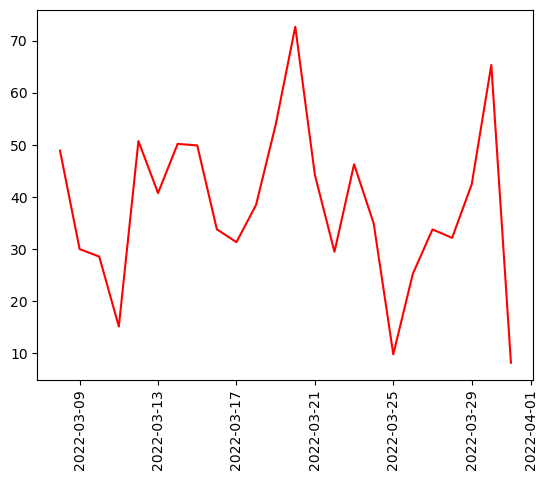

In [37]:
import matplotlib.pyplot as plt
t_wrong_sched= [] 


for i in range(0,24):
    t_wrong_sched.append(results[i]['t_wrong_sched_%'])
plt.plot(predict_day[0:24],t_wrong_sched,'r')
plt.xticks(rotation=90)


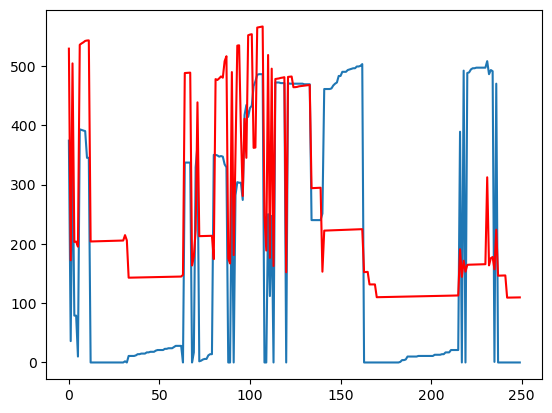

In [38]:
plt.plot(df_predict['day1']['queue_minutes'].to_numpy()[0:250])
plt.plot(results[0]['y_pred'][0:250],'r')

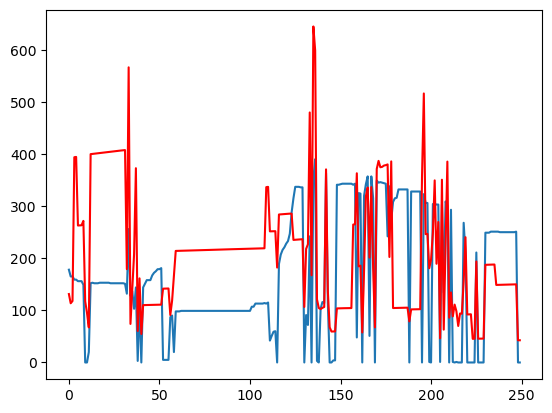

In [39]:
plt.plot(df_predict['day2']['queue_minutes'].to_numpy()[0:250])
plt.plot(results[1]['y_pred'][0:250],'r')

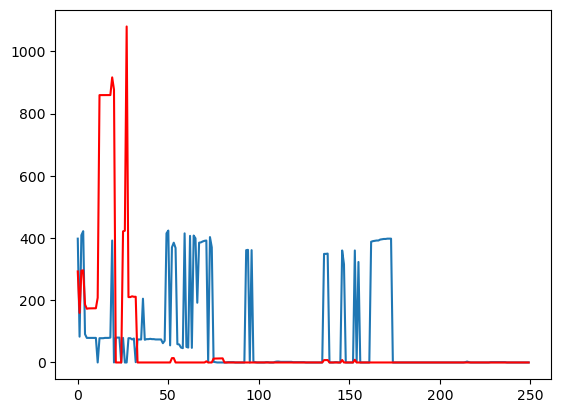

In [40]:
plt.plot(df_predict['day3']['queue_minutes'].to_numpy()[0:250])
plt.plot(results[2]['y_pred'][0:250],'r')

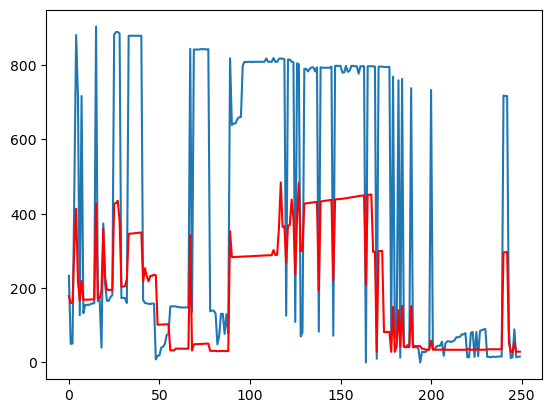

In [41]:
plt.plot(df_predict['day4']['queue_minutes'].to_numpy()[0:250])
plt.plot(results[3]['y_pred'][0:250],'r')

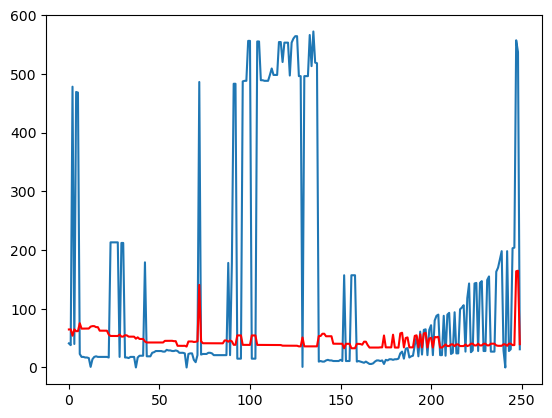

In [42]:
plt.plot(df_predict['day5']['queue_minutes'].to_numpy()[0:250])
plt.plot(results[4]['y_pred'][0:250],'r')

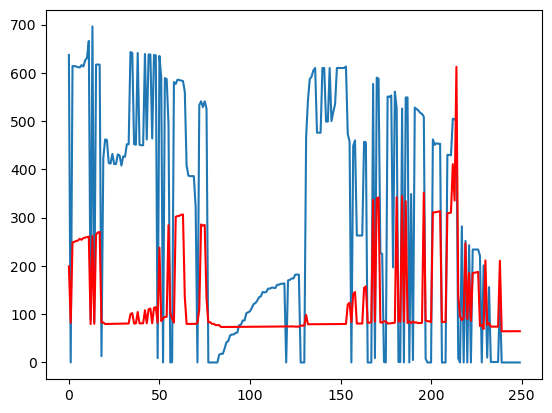

In [43]:
plt.plot(df_predict['day6']['queue_minutes'].to_numpy()[0:250])
plt.plot(results[5]['y_pred'][0:250],'r')

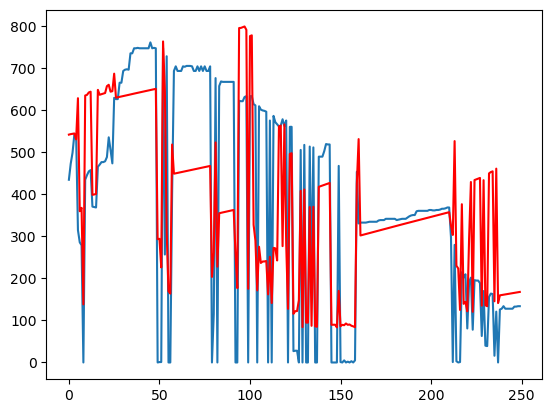

In [44]:
plt.plot(df_predict['day7']['queue_minutes'].to_numpy()[0:250])
plt.plot(results[6]['y_pred'][0:250],'r')

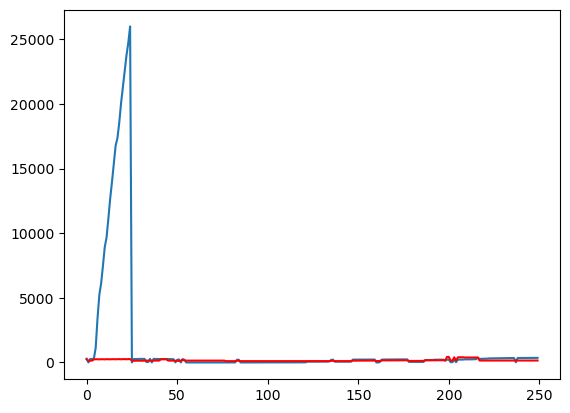

In [45]:
plt.plot(df_predict['day8']['queue_minutes'].to_numpy()[0:250])
plt.plot(results[7]['y_pred'][0:250],'r')

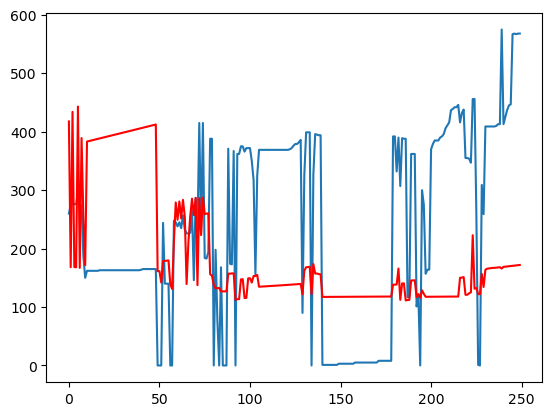

In [46]:
plt.plot(df_predict['day9']['queue_minutes'].to_numpy()[0:250])
plt.plot(results[8]['y_pred'][0:250],'r')

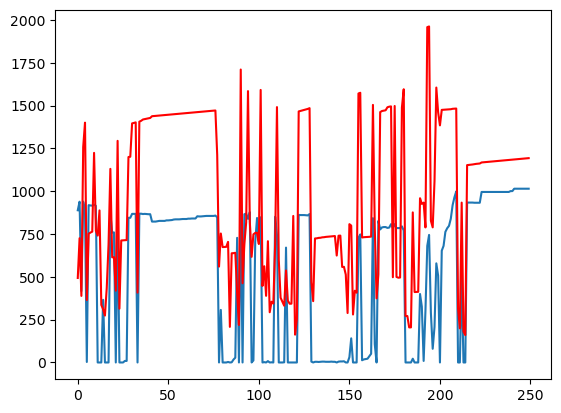

In [47]:
plt.plot(df_predict['day10']['queue_minutes'].to_numpy()[0:250])
plt.plot(results[9]['y_pred'][0:250],'r')

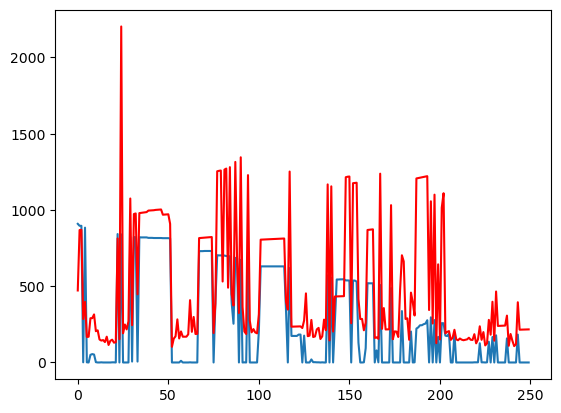

In [48]:
plt.plot(df_predict['day11']['queue_minutes'].to_numpy()[0:250])
plt.plot(results[10]['y_pred'][0:250],'r')

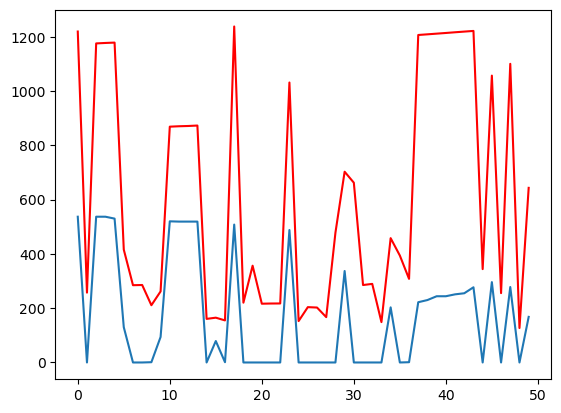

In [49]:
import matplotlib.pyplot as plt
plt.plot(df_predict['day11']['queue_minutes'].to_numpy()[150:200])
plt.plot(results[10]['y_pred'][150:200],'r')

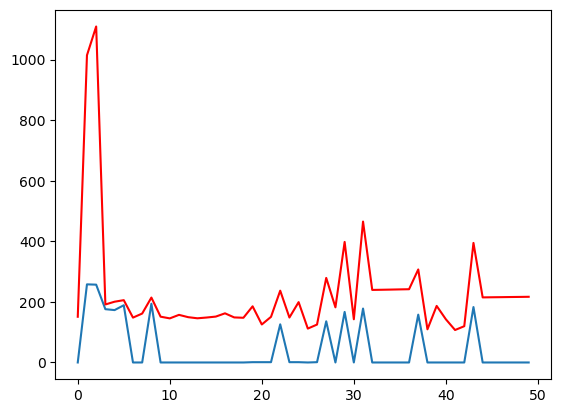

In [50]:
plt.plot(df_predict['day11']['queue_minutes'].to_numpy()[200:250])
plt.plot(results[10]['y_pred'][200:250],'r')

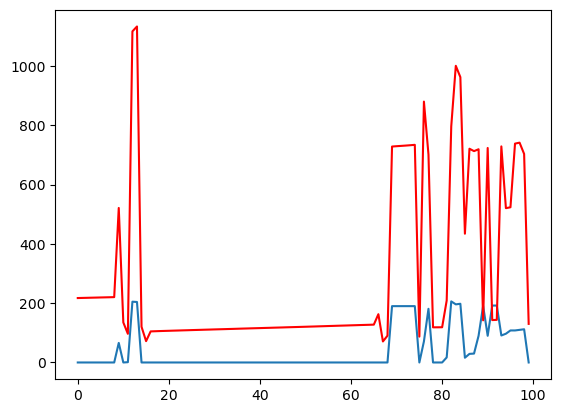

In [51]:
plt.plot(df_predict['day11']['queue_minutes'].to_numpy()[250:350])
plt.plot(results[10]['y_pred'][250:350],'r')

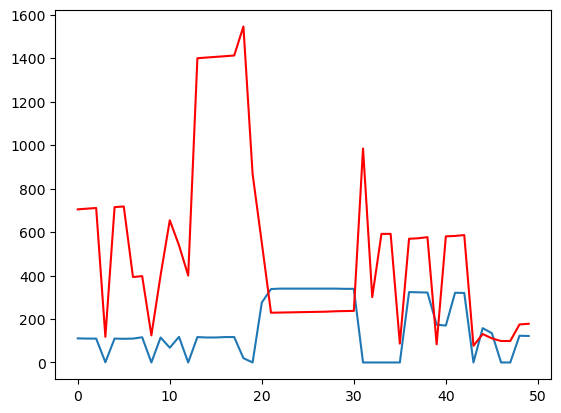

In [52]:
plt.plot(df_predict['day11']['queue_minutes'].to_numpy()[350:400])
plt.plot(results[10]['y_pred'][350:400],'r')

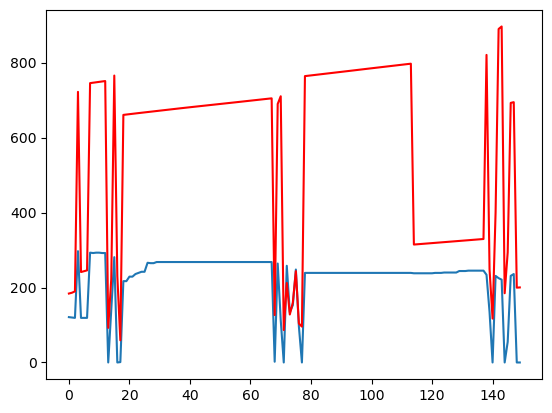

In [53]:
plt.plot(df_predict['day11']['queue_minutes'].to_numpy()[400:550])
plt.plot(results[10]['y_pred'][400:550],'r')

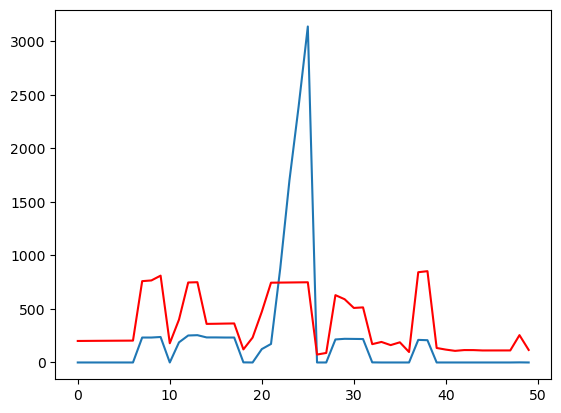

In [54]:
plt.plot(df_predict['day11']['queue_minutes'].to_numpy()[550:600])
plt.plot(results[10]['y_pred'][550:600],'r')

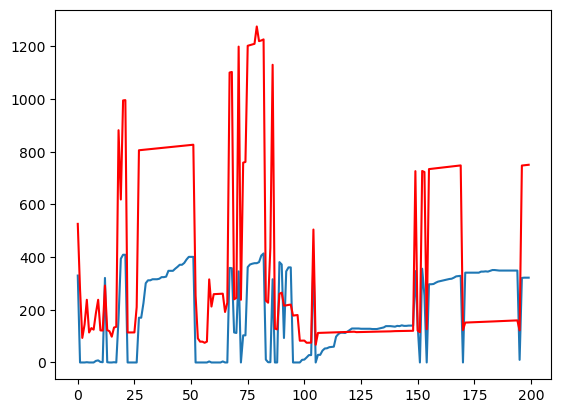

In [55]:
plt.plot(df_predict['day11']['queue_minutes'].to_numpy()[600:800])
plt.plot(results[10]['y_pred'][600:800],'r')

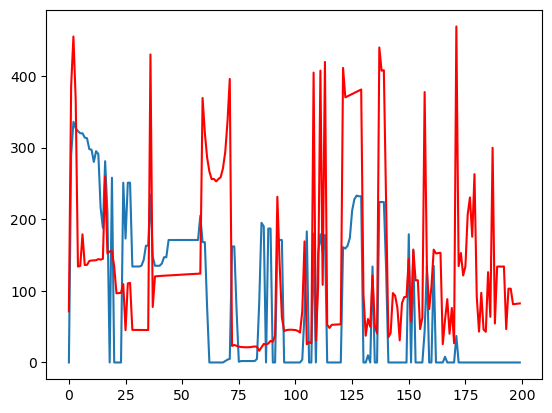

In [56]:
plt.plot(df_predict['day12']['queue_minutes'].to_numpy()[0:200])
plt.plot(results[11]['y_pred'][0:200],'r')

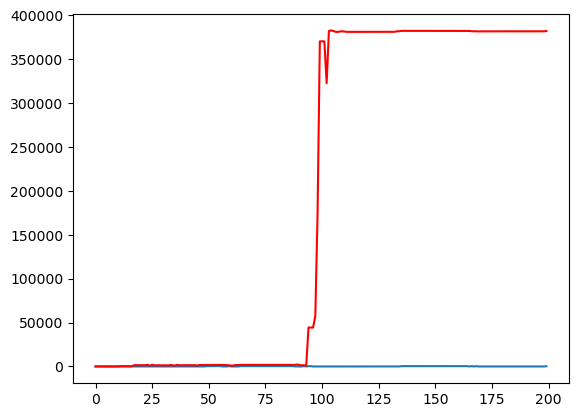

In [57]:
plt.plot(df_predict['day12']['queue_minutes'].to_numpy()[200:400])
plt.plot(results[11]['y_pred'][200:400],'r')

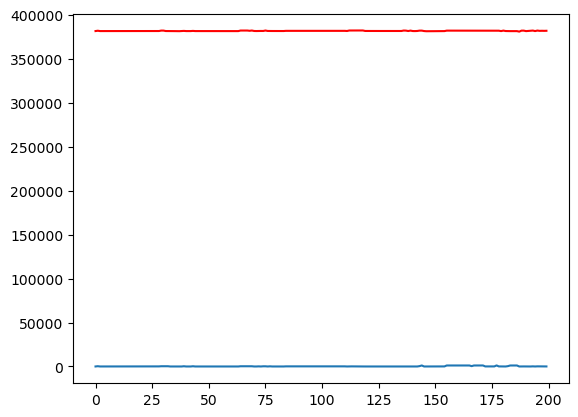

In [58]:
plt.plot(df_predict['day12']['queue_minutes'].to_numpy()[400:600])
plt.plot(results[11]['y_pred'][400:600],'r')

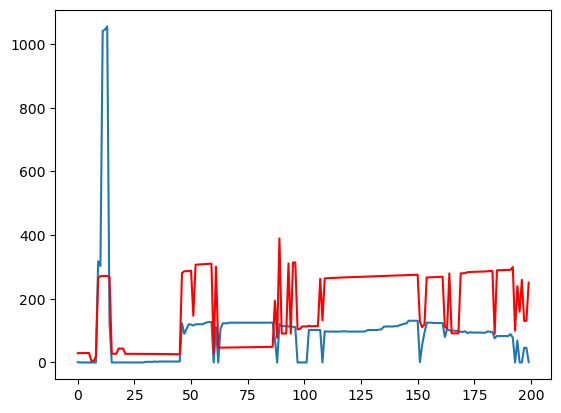

In [59]:
plt.plot(df_predict['day13']['queue_minutes'].to_numpy()[0:200])
plt.plot(results[12]['y_pred'][0:200],'r')

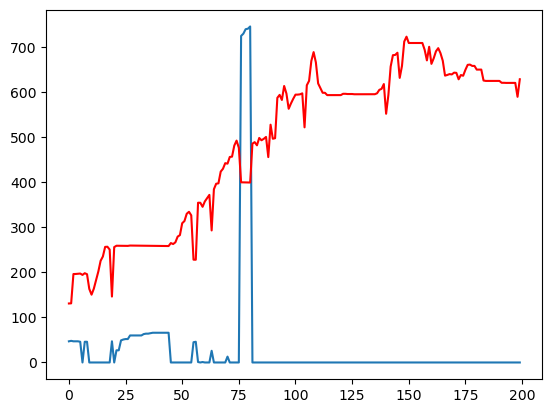

In [60]:
plt.plot(df_predict['day13']['queue_minutes'].to_numpy()[200:400])
plt.plot(results[12]['y_pred'][200:400],'r')

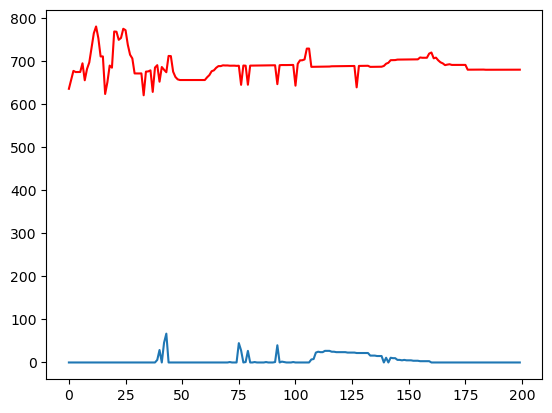

In [61]:
plt.plot(df_predict['day13']['queue_minutes'].to_numpy()[400:600])
plt.plot(results[12]['y_pred'][400:600],'r')

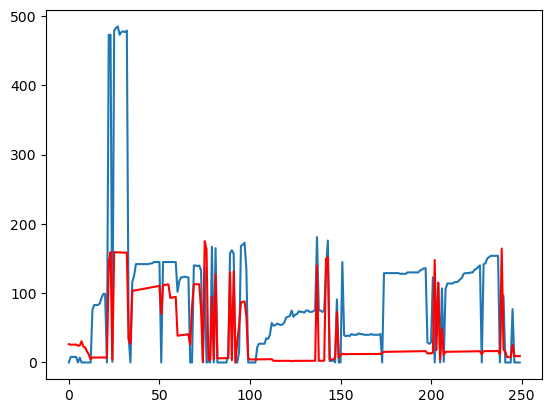

In [62]:
plt.plot(df_predict['day14']['queue_minutes'].to_numpy()[0:250])
plt.plot(results[13]['y_pred'][0:250],'r')

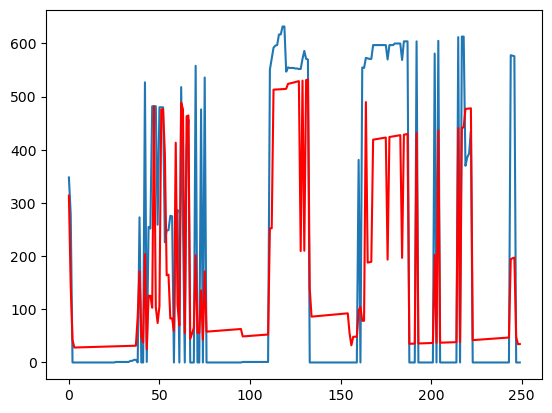

In [63]:
plt.plot(df_predict['day15']['queue_minutes'].to_numpy()[0:250])
plt.plot(results[14]['y_pred'][0:250],'r')

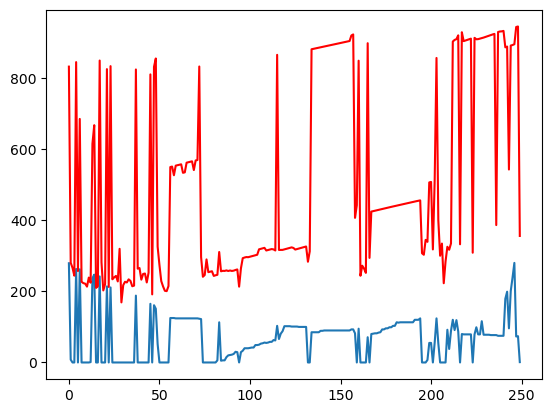

In [64]:
plt.plot(df_predict['day16']['queue_minutes'].to_numpy()[0:250])
plt.plot(results[15]['y_pred'][0:250],'r')

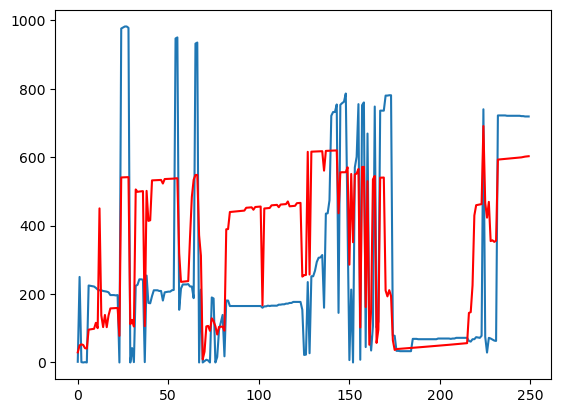

In [65]:
plt.plot(df_predict['day17']['queue_minutes'].to_numpy()[0:250])
plt.plot(results[16]['y_pred'][0:250],'r')

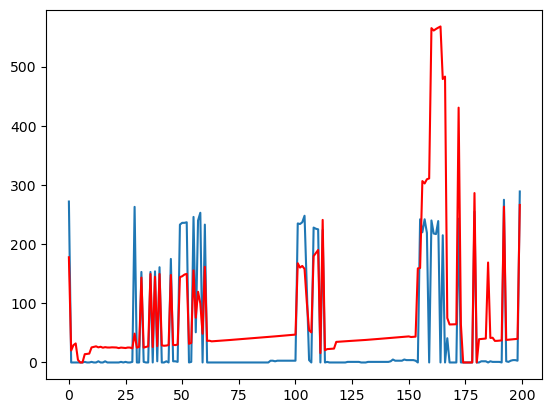

In [82]:
plt.plot(df_predict['day24']['queue_minutes'].to_numpy()[0:200])
plt.plot(results[23]['y_pred'][0:200],'r')